# Seattle incidents

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [49]:
import datetime

In [2]:
crime = pd.read_csv('seattle_incidents_summer_2014.csv')


D:\Applications\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


In [3]:
crime['Occurred Date or Date Range Start'] = pd.to_datetime(crime['Occurred Date or Date Range Start'])

In [5]:
crime['Occurred Date Range End'] = pd.to_datetime(crime['Occurred Date Range End'])

In [6]:
month_group=crime.groupby(crime['Month']).count()
month_group.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
Month,,,,,,,,,,,,,,,,,,,
6,11125,11125,11125,11125,11125,11125,11125,11125,11125,5721,11125,11109,11110,11079,11125,11125,11125,11125,11125
7,11154,11154,11154,11154,11154,11154,11154,11154,11154,5581,11154,11132,11132,11105,11154,11154,11154,11154,11154
8,10500,10500,10500,10500,10500,10500,10500,10500,10500,5197,10500,10481,10481,10461,10500,10500,10500,10500,10500


# Number of incidents in different months are similar

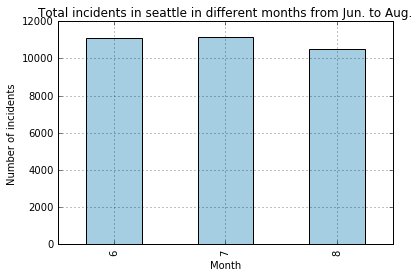

In [34]:
month_group['Month'].plot(kind='bar',title='Total incidents in seattle in different months from Jun. to Aug.',grid=True, colormap=plt.cm.Paired)
plt.ylabel('Number of incidents')

In [18]:
crime['District/Sector'].unique()

array(['J', 'C', 'F', 'M', 'R', 'Q', 'B', 'D', 'E', 'L', 'N', 'S', 'U',
       'W', 'G', 'K', '99', 'O', nan], dtype=object)

In [31]:
district_group=crime.groupby(crime['District/Sector'])['District/Sector'].count()
district_group=district_group.drop(['99'])
district_group.head()

District/Sector
B    2338
C    1680
D    2063
E    2255
F    1594
Name: District/Sector, dtype: int64

In [32]:
district_group=district_group.sort_values()

# Number of incidents in district M is the most, while the district O is the safest. 

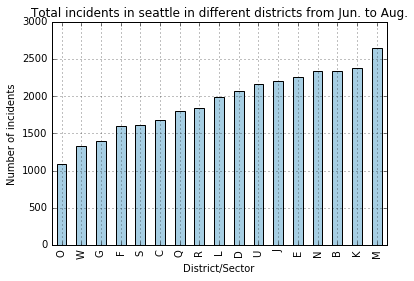

In [35]:
district_group.plot(kind='bar',title='Total incidents in seattle in different districts from Jun. to Aug.',grid=True, colormap=plt.cm.Paired)
plt.ylabel('Number of incidents')

In [40]:
crime['Day']=crime['Occurred Date or Date Range Start'].dt.date

In [42]:
crime['Time']=crime['Occurred Date or Date Range Start'].dt.time

In [45]:
day_crime=crime[crime['Month']==6].groupby(crime['Day'])['Day'].count()

# The incidents pattern during June in different days is not obvious.

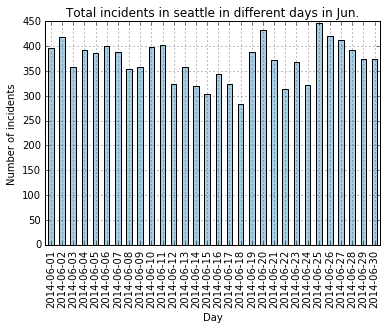

In [47]:
day_crime.plot(kind='bar',title='Total incidents in seattle in different days in Jun.',grid=True, colormap=plt.cm.Paired)
plt.ylabel('Number of incidents')

In [58]:
def time_bins(s):
    if s<datetime.time(hour=6):
        return 0
    elif s<datetime.time(hour=12):
        return 1
    elif s<datetime.time(hour=18):
        return 2
    else:
        return 3
    

In [60]:
crime['Time_bins']=crime['Time'].apply(time_bins)

In [61]:
Timebin_crime=crime['Time_bins'].groupby(crime['Time_bins']).count()

# Most incidents in Seattle took place in the night 

([<matplotlib.axis.XTick at 0xf7d8278>,
 <a list of 4 Text xticklabel objects>)

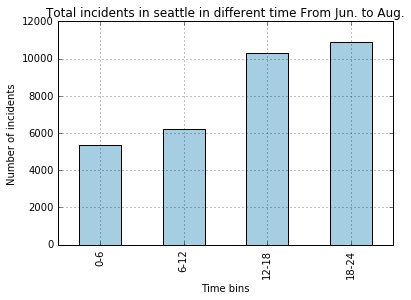

In [68]:
Timebin_crime.plot(kind='bar',title='Total incidents in seattle in different time From Jun. to Aug.',grid=True, colormap=plt.cm.Paired)
plt.ylabel('Number of incidents')
plt.xlabel('Time bins')
plt.xticks(np.arange(4),('0-6','6-12','12-18','18-24'))